In [139]:
# import packages 
import statsmodels.api as sm #statistical analysis: including linear regression,logistic regression, time series analysis
import numpy as np # for numerical computing in Python. Data manipulation, numerical operations, and handling large dataset
import pandas as pd # data wrangling and preparation. usually DS use this for loan, clean, transform data, and for EDA
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
from sklearn import datasets # to experiment with machine learning algorithms.
from sklearn import metrics # metrics for evaluating the performance of ML models: for accuracy, precision, recall, F-1 score
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import os

In [2]:
# Variables in house data: 
# CRIM - per capita crime rate by town
# ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
# INDUS - proportion of non-retail business acres per town.
# CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
# NOX - nitric oxides concentration (parts per 10 million)
# RM - average number of rooms per dwelling
# AGE - proportion of owner-occupied units built prior to 1940
# DIS - weighted distances to five Boston employment centres
# RAD - index of accessibility to radial highways
# TAX - full-value property-tax rate per $10,000
# PTRATIO - pupil-teacher ratio by town
# LSTAT - % lower status of the population
# MEDV - Median value of owner-occupied homes in $1000's

current_directory = os.getcwd()
print("Current Working Directory:", current_directory)

Current Working Directory: C:\Users\elvin\ISM 6353 - Python Class\Lab 2


In [3]:
df = pd.read_csv("house.csv")

In [4]:
df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,17.10,18.9


In [5]:
df.shape

(506, 13)

In [6]:
df.head(100)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.12204,0.0,2.89,0,0.445,6.625,57.8,3.4952,2,276,18.0,6.65,28.4
96,0.11504,0.0,2.89,0,0.445,6.163,69.6,3.4952,2,276,18.0,11.34,21.4
97,0.12083,0.0,2.89,0,0.445,8.069,76.0,3.4952,2,276,18.0,4.21,38.7
98,0.08187,0.0,2.89,0,0.445,7.820,36.9,3.4952,2,276,18.0,3.57,43.8


In [7]:
X = df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']]
# X = house[['ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']]
# X = house[['CRIM', 'ZN', 'INDUS', 'CHAS']]
y = df['MEDV'] 


In [8]:
X


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48


In [9]:
y


0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state = 101)
#the random_state gives me the ability to control over the randomness of the data split. so the random data split stays the same


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state = 70)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state = 101)

In [13]:
house.shape, X_train.shape, X_test.shape 

NameError: name 'house' is not defined

In [ ]:
model1 = LinearRegression(fit_intercept=True) 
#fit_intercept=true will estimate both the slope (coefficients for independent variable) and the intercept term.

model1.fit(X_train, y_train) # Training the model, after we run this line, it's ready to test new data.


In [ ]:
#Model Evaluation

model1.intercept_

In [ ]:
model1.coef_ 

In [ ]:
X.columns 
# Variables in house data: 
# CRIM - per capita crime rate by town
# ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
# INDUS - proportion of non-retail business acres per town.
# CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
# NOX - nitric oxides concentration (parts per 10 million)
# RM - average number of rooms per dwelling
# AGE - proportion of owner-occupied units built prior to 1940
# DIS - weighted distances to five Boston employment centres
# RAD - index of accessibility to radial highways
# TAX - full-value property-tax rate per $10,000
# PTRATIO - pupil-teacher ratio by town
# LSTAT - % lower status of the population
# MEDV - Median value of owner-occupied homes in $1000's

In [ ]:
coeff_df = pd.DataFrame(model1.coef_, X.columns, columns=['Coefficient']) #Creating a dataframe. 
coeff_df

In [ ]:
predictions1 = model1.predict(X_test)



In [ ]:
len(predictions1), len(X_test) #len means length of number of elements.

In [ ]:
predictions1

In [ ]:
#Regression Evaluation Metrics

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions1))
print('MSE:', metrics.mean_squared_error(y_test, predictions1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions1))) # numpy func np.sqrt takes sq root


In [ ]:
model3 = Lasso()

In [ ]:
model3

In [14]:
store = pd.read_csv("Superstore.csv")

In [15]:
store.head(10)

,Category,City,Container,Customer ID,Customer Name,Customer Segment,Department,Discount,Item ID,Item,...,Product Base Margin,Profit,Region,Row ID,Sales,Ship Date,Ship Mode,Shipping Cost,State,Unit Price
0,Paper,Lombard,Small Box,3035,Mark Bailey,Home Office,Office Supplies,0.01,10074,Hammermill CopyPlus Copy Paper (20Lb. and 84 B...,...,0.36,-76,Central,11/18/1951,53,11/9/2018,Regular Air,5,Illinois,5
1,Paper,Lombard,Wrap Bag,3035,Mark Bailey,Home Office,Office Supplies,0.04,10079,Telephone Message Books with Fax/Mobile Sectio...,...,0.39,52,Central,11/19/1951,76,11/12/2016,Regular Air,1,Illinois,6
2,Pens & Art Supplies,Southbury,Wrap Bag,3385,Daniel Richmond,Corporate,Office Supplies,0.04,11012,"Premium Writing Pencils, Soft, #2 by Central A...",...,0.57,-22,East,3/1/1961,16,11/23/2017,Express Air,2,Connecticut,3
3,Binders and Binder Accessories,Coachella,Small Box,3133,Kristine Singleton,Corporate,Office Supplies,0.10,10646,Fellowes Black Plastic Comb Bindings,...,0.39,-350,West,6/27/1961,65,1/25/2018,Regular Air,8,California,6
4,Rubber Bands,Coachella,Wrap Bag,3133,Kristine Singleton,Corporate,Office Supplies,0.03,10138,Assorted Color Push Pins,...,0.52,4,West,6/28/1961,19,1/25/2018,Regular Air,1,California,2
5,Storage & Organization,Hot Springs,Small Box,1697,Holly Osborne,Home Office,Office Supplies,0.00,10896,"Fellowes Personal Hanging Folder Files, Navy",...,0.57,-254,South,4/13/1968,130,9/4/2017,Regular Air,6,Arkansas,13
6,Tables,Woodmere,Jumbo Box,1603,Dwight Pentecost,Small Business,Furniture,0.05,10550,"Bevis Round Conference Table Top, X-Base",...,0.76,-537,East,6/6/1964,187,1/13/2018,Delivery Truck,29,New York,179
7,Office Furnishings,Laurel,Medium Box,2924,Courtney Nelson,Consumer,Furniture,0.02,10535,"Rubbermaid ClusterMat Chairmats, Mat Size- 66""...",...,0.69,-106,East,3/23/1950,227,10/20/2017,Regular Air,14,Maryland,111
8,Paper,Laurel,Wrap Bag,2924,Courtney Nelson,Consumer,Office Supplies,0.01,11122,"TOPS Money Receipt Book, Consecutively Numbere...",...,0.40,45,East,3/24/1950,69,10/18/2018,Regular Air,3,Maryland,8
9,Rubber Bands,Woodmere,Wrap Bag,1603,Dwight Pentecost,Small Business,Office Supplies,0.09,10573,Stockwell Push Pins,...,0.52,2,East,6/5/1964,19,1/13/2018,Regular Air,1,New York,2


In [16]:
%matplotlib inline


In [24]:
# Lab 2 Question 2: 
'''2. Use the Superstore.csv data. Create a horizontal bar chart of counts of rows by customer segment. 
 To refer to variable names with space, use [] (e.g. df['Customer Segment']). 
 Which customer segment has the most customers? '''

In [28]:
store_segment = store.value_counts(['Customer Segment'])#.to_frame().reset_index()

#df3 = df2.value_counts('day').to_frame().reset_index()
#df3.columns = ['day', 'bills']
#df3

In [29]:
store_segment

Customer Segment
Corporate           3375
Home Office         2316
Consumer            1894
Small Business      1841
dtype: int64

In [45]:
store_segment = store.value_counts(['Customer Segment']).to_frame().reset_index()
store_segment.columns = ['Customer Segment', 'Count']
store_segment
# Corporate has the most customers. Q2: Corporate

,Customer Segment,Count
0,Corporate,3375
1,Home Office,2316
2,Consumer,1894
3,Small Business,1841


<Figure size 1000x600 with 0 Axes>

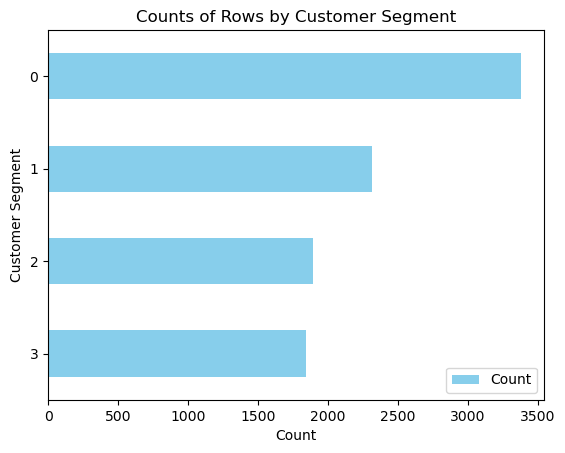

In [46]:
# Create a horizontal bar chart for customer segment
plt.figure(figsize=(10, 6))
store_segment.plot(kind='barh', color='skyblue')
plt.xlabel('Count')
plt.ylabel('Customer Segment')
plt.title('Counts of Rows by Customer Segment')
plt.gca().invert_yaxis()  # Invert y-axis to display the largest segment at the top
plt.show()

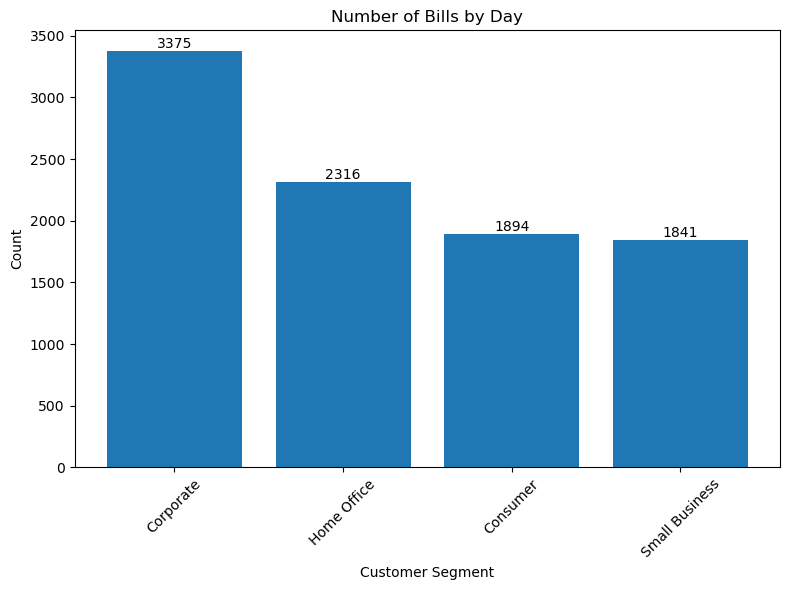

In [54]:
fig, ax = plt.subplots(figsize=(8,6))

ax.bar(store_segment['Customer Segment'], store_segment['Count'])

ax.set_xlabel('Customer Segment')
ax.set_ylabel('Count')
ax.set_title('Number of Bills by Day')

for i in range(len(store_segment)):
    plt.text(i, store_segment['Count'][i], store_segment['Count'][i], ha='center', va='bottom')

plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability if needed
plt.tight_layout()  # Ensures the plot fits within the figure area
plt.show()

In [ ]:
# 4. Use the Superstore.csv data. Create a pie chart of percent of rows by region. 
# Print the percent for each region on the plot. What percent of the rows are from the east region? 
# Round to nearest 2 decimals. 

In [67]:
region = store['Region'].value_counts().to_frame().reset_index()
region.columns = ['Region', 'count']
region

,Region,count
0,East,3099
1,Central,2589
2,West,1949
3,South,1789


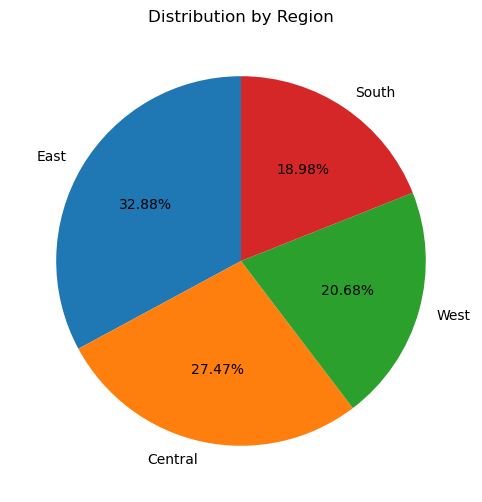

In [72]:
fig, ax = plt.subplots(figsize=(8, 6))

# Use 'count' as the numerical data and 'Region' as labels
ax.pie(region['count'], labels=region['Region'], autopct='%0.2f%%', startangle=90)

ax.set_title('Distribution by Region')

plt.show()


In [61]:
print(store.columns)

Index(['Category', 'City', 'Container', 'Customer ID', 'Customer Name',
       'Customer Segment', 'Department', 'Discount', 'Item ID', 'Item',
       'Number of Records', 'Order Date', 'Order ID', 'Order Priority',
       'Order Quantity', 'Postal Code', 'Product Base Margin', 'Profit',
       'Region', 'Row ID', 'Sales', 'Ship Date', 'Ship Mode', 'Shipping Cost',
       'State', 'Unit Price'],
      dtype='object')


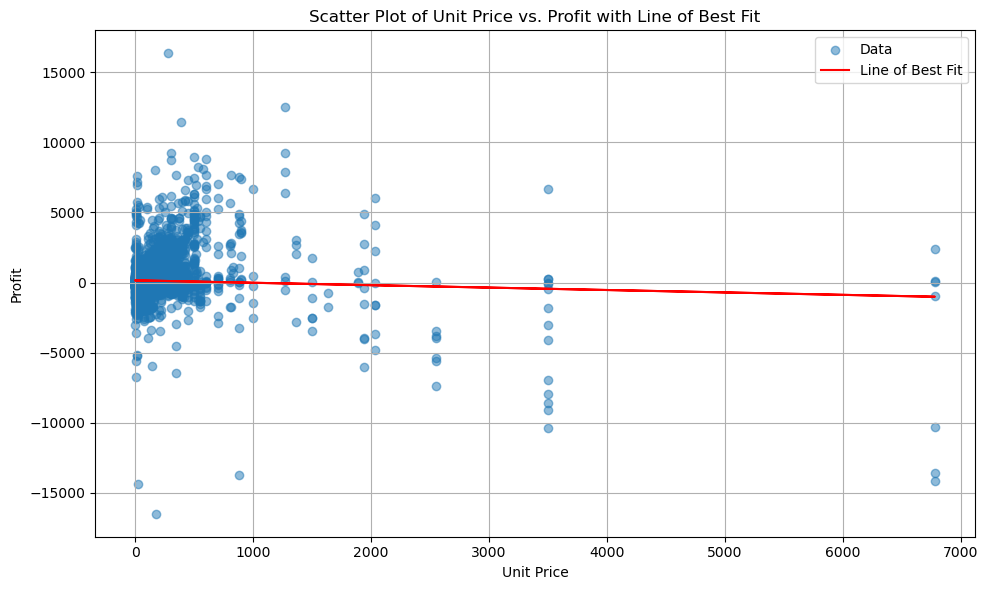

In [76]:
# 5. Use the Superstore.csv data. Create a scatter plot of unit price (x) vs. profit (y). 
# Also create the line of best fit. Upload the figure below. 

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(store['Unit Price'], store['Profit'], alpha=0.5, label='Data')

# Fit a line of best fit using linear regression
regression = LinearRegression()
regression.fit(store[['Unit Price']], store['Profit'])

# Plot the line of best fit
plt.plot(store['Unit Price'], regression.predict(store[['Unit Price']]), color='red', label='Line of Best Fit')

# Step 6: Customize the plot and labels
plt.xlabel('Unit Price')
plt.ylabel('Profit')
plt.title('Scatter Plot of Unit Price vs. Profit with Line of Best Fit')
plt.legend()

# Display the figure
plt.grid(True)
plt.tight_layout()
plt.show()

In [77]:
# 6. In the question above, what is the slope of the line of best fit? 
# Round to nearest 2 decimals. 

# Calculate the slope (coefficient) of the line of best fit
slope = regression.coef_[0]

# Round the slope to two decimal places
rounded_slope = round(slope, 2)

# Print the rounded slope
print(f"The slope of the line of best fit is approximately {rounded_slope}")


The slope of the line of best fit is approximately -0.17


The department with the smallest range of sales is 'Office Supplies' with a range of 45736.00


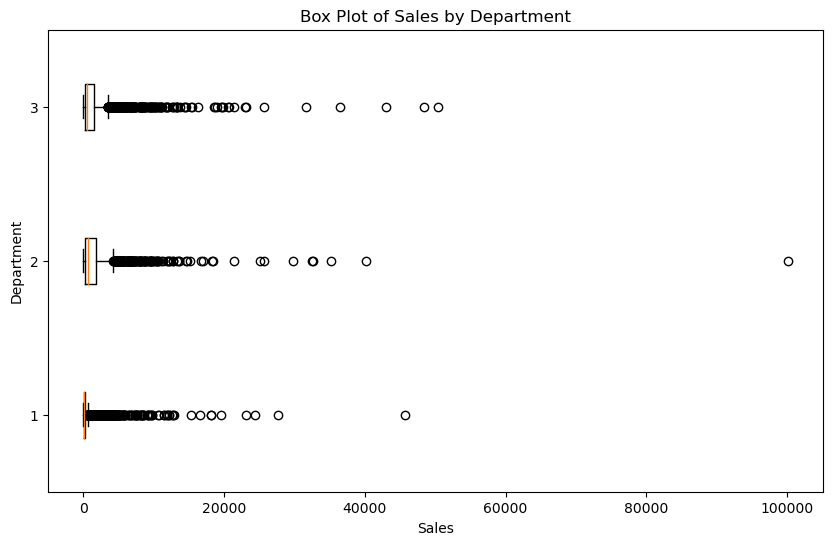

In [80]:
# 7. Use the Superstore.csv data. Create a box plot of by sales by department. Add the propoer labels on both axes. 
# Which department has the smallest range of sales? 


# Create a box plot of sales by department
plt.figure(figsize=(10, 6))
plt.boxplot([store[store['Department'] == department]['Sales'] for department in store['Department'].unique()], vert=False)

# Customize the plot and labels
plt.xlabel('Sales')
plt.ylabel('Department')
plt.title('Box Plot of Sales by Department')

# Identify the department with the smallest range of sales
department_ranges = {}
for department in store['Department'].unique():
    sales_data = store[store['Department'] == department]['Sales']
    sales_range = sales_data.max() - sales_data.min()
    department_ranges[department] = sales_range

# Find the department with the smallest range of sales
smallest_range_department = min(department_ranges, key=department_ranges.get)
smallest_range = department_ranges[smallest_range_department]

print(f"The department with the smallest range of sales is '{smallest_range_department}' with a range of {smallest_range:.2f}")


In [81]:
store.head(5)

,Category,City,Container,Customer ID,Customer Name,Customer Segment,Department,Discount,Item ID,Item,...,Product Base Margin,Profit,Region,Row ID,Sales,Ship Date,Ship Mode,Shipping Cost,State,Unit Price
0,Paper,Lombard,Small Box,3035,Mark Bailey,Home Office,Office Supplies,0.01,10074,Hammermill CopyPlus Copy Paper (20Lb. and 84 B...,...,0.36,-76,Central,11/18/1951,53,11/9/2018,Regular Air,5,Illinois,5
1,Paper,Lombard,Wrap Bag,3035,Mark Bailey,Home Office,Office Supplies,0.04,10079,Telephone Message Books with Fax/Mobile Sectio...,...,0.39,52,Central,11/19/1951,76,11/12/2016,Regular Air,1,Illinois,6
2,Pens & Art Supplies,Southbury,Wrap Bag,3385,Daniel Richmond,Corporate,Office Supplies,0.04,11012,"Premium Writing Pencils, Soft, #2 by Central A...",...,0.57,-22,East,3/1/1961,16,11/23/2017,Express Air,2,Connecticut,3
3,Binders and Binder Accessories,Coachella,Small Box,3133,Kristine Singleton,Corporate,Office Supplies,0.10,10646,Fellowes Black Plastic Comb Bindings,...,0.39,-350,West,6/27/1961,65,1/25/2018,Regular Air,8,California,6
4,Rubber Bands,Coachella,Wrap Bag,3133,Kristine Singleton,Corporate,Office Supplies,0.03,10138,Assorted Color Push Pins,...,0.52,4,West,6/28/1961,19,1/25/2018,Regular Air,1,California,2


In [93]:
print(store.columns)
unique_values = store['Region'].unique()

# 'unique_values' will contain an array of unique values from the specified column.
print(unique_values)

Index(['Category', 'City', 'Container', 'Customer ID', 'Customer Name',
       'Customer Segment', 'Department', 'Discount', 'Item ID', 'Item',
       'Number of Records', 'Order Date', 'Order ID', 'Order Priority',
       'Order Quantity', 'Postal Code', 'Product Base Margin', 'Profit',
       'Region', 'Row ID', 'Sales', 'Ship Date', 'Ship Mode', 'Shipping Cost',
       'State', 'Unit Price'],
      dtype='object')
['Central' 'East' 'West' 'South']


The department with the smallest range of sales is 'Office Supplies' with a range of 45736.00


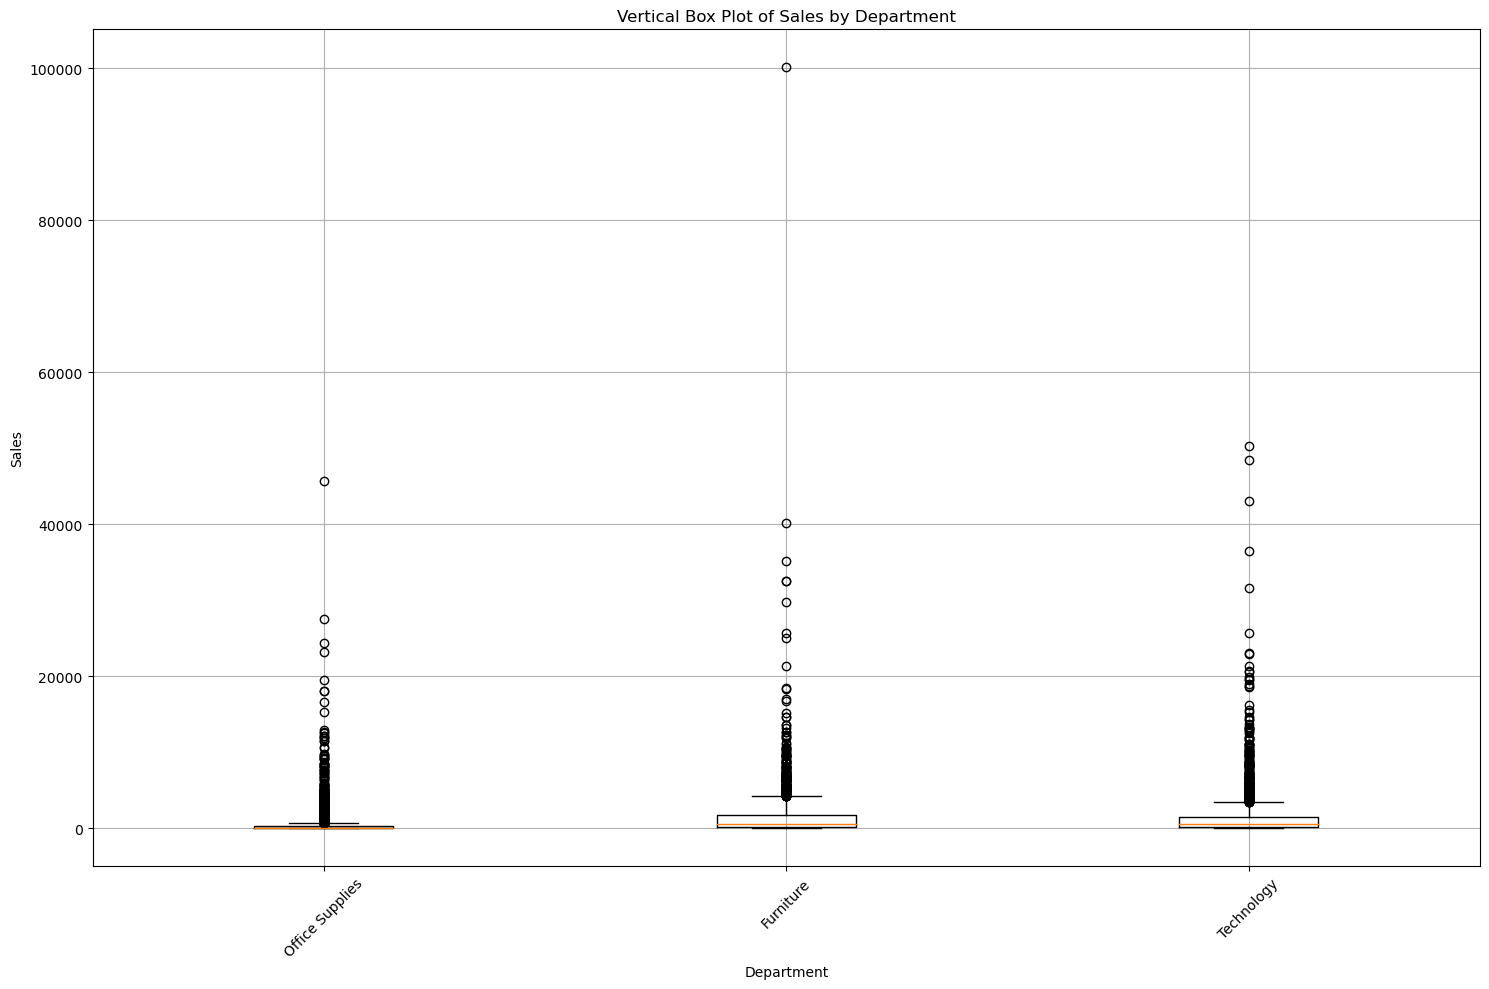

In [90]:

# Assuming you have already loaded the Superstore data into a DataFrame named 'store'

# Create a vertical box plot of sales by department
plt.figure(figsize=(15, 10))
plt.boxplot([store[store['Department'] == department]['Sales'] for department in store['Department'].unique()])

# Customize the plot and labels
plt.xticks(np.arange(1, len(store['Department'].unique()) + 1), store['Department'].unique(), rotation=45)
plt.xlabel('Department')
plt.ylabel('Sales')
plt.title('Vertical Box Plot of Sales by Department')

# Identify the department with the smallest range of sales
department_ranges = {}
for department in store['Department'].unique():
    sales_data = store[store['Department'] == department]['Sales']
    sales_range = sales_data.max() - sales_data.min()
    department_ranges[department] = sales_range

# Find the department with the smallest range of sales
smallest_range_department = min(department_ranges, key=department_ranges.get)
smallest_range = department_ranges[smallest_range_department]

print(f"The department with the smallest range of sales is '{smallest_range_department}' with a range of {smallest_range:.2f}")

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()


In [100]:
#Create Dummy Variables for Region:'Central' 'East' 'West' 'South']

df_d = pd.get_dummies(store['Region'], prefix='Region', drop_first=True)
df_d

,Region_East,Region_South,Region_West
0,0,0,0
1,0,0,0
2,1,0,0
3,0,0,1
4,0,0,1
...,...,...,...
9421,0,0,1
9422,0,0,0
9423,1,0,0
9424,1,0,0


In [103]:
# 9. In the question above, merge the dummy variable columns with the original data. Something like pd.concat([df, df2], axis = 1) can work.
# Build a linear regression with statsmodels using sales as the y-variable, and unit price and region dummies as the x-variables. 
# What is the p-value for south region? Round to nearest 3 decimals. 

# Merge the 2 columns
merged_df = pd.concat([store, df_d], axis=1)

merged_df.head(5)

print(merged_df.columns)

Index(['Category', 'City', 'Container', 'Customer ID', 'Customer Name',
       'Customer Segment', 'Department', 'Discount', 'Item ID', 'Item',
       'Number of Records', 'Order Date', 'Order ID', 'Order Priority',
       'Order Quantity', 'Postal Code', 'Product Base Margin', 'Profit',
       'Region', 'Row ID', 'Sales', 'Ship Date', 'Ship Mode', 'Shipping Cost',
       'State', 'Unit Price', 'Region_East', 'Region_South', 'Region_West'],
      dtype='object')


In [105]:
# Build a linear regression with statsmodels using sales as the y-variable, and unit price 
# and region dummies as the x-variables. 

X= merged_df[['Unit Price','Region_East', 'Region_South', 'Region_West']]

# Add a constant to the independent variables (intercept)
X = sm.add_constant(X)

# Define the dependent variable (y)
y = merged_df['Sales']

# Create and fit the linear regression model
model = sm.OLS(y, X).fit()

# Get the summary of the regression model
summary = model.summary()

# Print the summary
print(summary)

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     549.2
Date:                Sun, 24 Sep 2023   Prob (F-statistic):               0.00
Time:                        19:03:17   Log-Likelihood:                -86499.
No. Observations:                9426   AIC:                         1.730e+05
Df Residuals:                    9421   BIC:                         1.730e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          561.1422     46.512     12.065   

In [106]:
# from the data viz notebook. how to find RMSE
print('MAE:', metrics.mean_absolute_error(y_test, predictions1))
print('MSE:', metrics.mean_squared_error(y_test, predictions1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions1))) # numpy func np.sqrt takes sq root

NameError: name 'predictions1' is not defined

In [109]:
house = pd.read_csv("house.csv")

In [110]:
house.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [117]:
# Q12. Using the house data, train a linear regression with sklearn using 
# Y = MEDV
# X = CRIM, ZN,INDUS, CHAS, NOX, RM, AGE 
# Use 25% of the data as test set, random_state=101. 
# What is the RMSE of the model for the training set? Round to nearest 2 decimals. 

x = house[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE']]
y = house['MEDV'] 


In [118]:
x


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2
1,0.02731,0.0,7.07,0,0.469,6.421,78.9
2,0.02729,0.0,7.07,0,0.469,7.185,61.1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8
4,0.06905,0.0,2.18,0,0.458,7.147,54.2
...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1
502,0.04527,0.0,11.93,0,0.573,6.120,76.7
503,0.06076,0.0,11.93,0,0.573,6.976,91.0
504,0.10959,0.0,11.93,0,0.573,6.794,89.3


In [119]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [120]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 101)

In [122]:
house.shape, x_train.shape, x_test.shape

((506, 13), (379, 7), (127, 7))

In [123]:
model1= LinearRegression(fit_intercept=True)

model1.fit(x_train, y_train)

LinearRegression()

In [130]:
# What is the RMSE of the model for the training set? Round to nearest 2 decimals. 

model1.intercept_


-19.118536983921278

In [131]:
model1.coef_



array([-0.17593639,  0.01718213, -0.13258668,  5.47232405, -1.49043442,
        7.31977403, -0.03119964])

In [133]:
x.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE'], dtype='object')

In [134]:
predictions1 = model1.predict(x_test)

In [135]:
predictions1

array([38.20848289, 30.52106119, 17.44828244, 19.56555133, 28.7299829 ,
       32.12982623, 40.4909988 , 19.7504408 , 24.95077691,  7.96349662,
       26.69574324, 16.81327245, 17.6539081 , 23.55536326, 21.86482233,
       13.32614326,  8.94993727, 30.33149952, 26.50373668, 24.11297962,
       13.98529142, 21.14465887, 20.05465036, 30.53718141, 32.43080154,
       19.5725901 , 31.85531981, 20.98279689, 21.71203257, 33.49482731,
       23.40065866, 18.62463   , 34.83528593, 44.36026283, 28.29759783,
       21.14958321, 21.64560625, 20.08771312, 15.67265768, 24.86735149,
       20.86864182, 24.21027639, 35.91000647, 12.37208998, 17.59957318,
       24.03833035, 29.53917494, 18.92279393, 26.27699943, 30.51887461,
       30.83872893, 43.9537498 , 17.22346037,  7.61518204, 29.92653855,
        1.40078842, 19.41704838, 18.79232918, 25.01004723, 21.76334236,
       33.50800284, 10.38055434, -0.06676413, 26.06481036, 14.86017731,
       25.69260911, 22.64168702, 20.89842475, 19.50471476, 18.58

In [137]:
# find the RMSE
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions1))) # numpy func np.sqrt takes sq root

RMSE: 6.544733951662647


In [146]:
# Define the independent variables (X) and dependent variable (y)
X = house[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE']]
y = house['MEDV']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

# Create and train the linear regression model
model4 = LinearRegression(fit_intercept=True)
model4.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = model4.predict(X_train)

# Calculate the RMSE for the training set
rmse_train = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))

# Round the RMSE to the nearest two decimals
rmse_train_rounded = round(rmse_train, 2)

In [147]:
rmse_train_rounded

5.67

In [148]:
# 13. Using the house data, train a Lasso and Ridge regression separately with sklearn using MEDV as the y-variable,
# and CRIM, ZN,INDUS, CHAS, NOX, RM, AGE as the x-variables. 
# Use random_state=101. Which model generates more coefficients close to 0? 

model3 = Lasso()

model3.fit(X, y) 


Lasso()

In [149]:
model3.intercept_

-6.134049962912762

In [154]:
coeff_df = pd.DataFrame(model3.coef_, X.columns, columns = ['Coefficient'])
coeff_df


,Coefficient
CRIM,-0.196625
ZN,0.028098
INDUS,-0.201293
CHAS,0.000000
NOX,-0.000000
RM,5.246829
AGE,-0.024476


In [158]:
model_ridge = Ridge()

In [159]:
model_ridge.fit(X,y)

Ridge()

In [160]:
coeff_ridge = pd.DataFrame(model_ridge.coef_, X.columns, columns = ['Coeff'])
coeff_ridge

# , if Lasso generates coefficients that are closer to 0 compared to Ridge,
#  indicates that Lasso is more effective at feature selection and feature sparsity.
#Ridge is more preventing overfitting by reducing the magnitude of coefficients. it doesnt perform feature selection as
# aggressively as Lasso

,Coeff
CRIM,-0.172047
ZN,0.014509
INDUS,-0.143715
CHAS,4.696820
NOX,-3.017937
RM,7.356429
AGE,-0.025762


In [161]:
house.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object')

In [162]:
# 15. Using the house data, build a linear regression with statsmodels using MEDV as the y-variable,
# and all other 12 variables as x-variables.
# Which variables are not statistically significant? Choose all that apply. 

X1 = house[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']]
X1 = sm.add_constant(X1) 
y = house["MEDV"] 


In [163]:
X1

,const,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
0,1.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98
1,1.0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14
2,1.0,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03
3,1.0,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94
4,1.0,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,1.0,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67
502,1.0,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08
503,1.0,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64
504,1.0,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48


In [164]:
sm_model = sm.OLS(y, X1).fit()

In [165]:
predictions_sm = sm_model.predict(X1)

In [167]:
sm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     113.5
Date:                Sun, 24 Sep 2023   Prob (F-statistic):          2.58e-133
Time:                        21:49:52   Log-Likelihood:                -1505.1
No. Observations:                 506   AIC:                             3036.
Df Residuals:                     493   BIC:                             3091.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.6980      4.938      8.444      0.000      31.995      51.401
CRIM          -0.1196      0.033     -3.637      0.000      -0.184      -0.055
ZN             0.0469      0.014      3.379      0.001       0.020       0.074
INDUS          0.0138      0.062      0.222      0.824      -0.108       0.136
CHAS           2.8450      0.870      3.269      0.001       1.135       4.555
NOX          -18.7944      3.853     -4.878      0.000     -26.365     -11.224
RM             3.6511      0.420      8.685      0.000       2.825       4.477
AGE            0.0037      0.013      0.278      0.781      -0.022       0.030
DIS           -1.4904      0.202     -7.389      0.000      -1.887      -1.094
RAD            0.2883      0.067      4.309      0.000       0.157       0.420
TAX           -0.0127      0.004     -3.335      0.001      -0.020      -0.005
PTRATIO       -0.9381      0.132     -7.093      0.000      -1.198      -0.678
LSTAT         -0.5533      0.051    -10.929      0.000      -0.653      -0.454
==============================================================================
Omnibus:                      170.972   Durbin-Watson:                   1.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              707.618
Skew:                           1.476   Prob(JB):                    2.20e-154
Kurtosis:                       7.984   Cond. No.                     1.17e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [168]:
# 16. Using the house data, build a linear regression with statsmodels using MEDV as the y-variable, 
# and 'CRIM', 'NOX', 'RM' as x-variables.


X2 = house[['CRIM', 'NOX', 'RM']]
X2 = sm.add_constant(X2) 
y = house["MEDV"] 


In [169]:
model16 = sm.OLS(y,X2).fit()
predictions16 = model16.predict(X2)
model16.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.560
Method:                 Least Squares   F-statistic:                     215.3
Date:                Sun, 24 Sep 2023   Prob (F-statistic):           9.54e-90
Time:                        21:54:38   Log-Likelihood:                -1631.0
No. Observations:                 506   AIC:                             3270.
Df Residuals:                     502   BIC:                             3287.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -19.0594      3.247     -5.870      0.000     -25.439     -12.680
CRIM          -0.1953      0.035     -5.588      0.000      -0.264      -0.127
NOX          -13.3721      2.654     -5.038      0.000     -18.586      -8.158
RM             7.9100      0.408     19.401      0.000       7.109       8.711
==============================================================================
Omnibus:                      218.945   Durbin-Watson:                   0.762
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1491.665
Skew:                           1.749   Prob(JB):                         0.00
Kurtosis:                      10.649   Cond. No.                         137.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [171]:
# What is the MEDV predicted for a data point with CRIM = 0.1, NOX = 0.6, and RM = 4? Round to nearest 2 decimals. 

X_test_point = pd.DataFrame({'const': [1],'CRIM':[0.1], 'RM': [4], 'NOX': [0.6]})[['const','CRIM', 'NOX', 'RM']]

prediction16 = model16.predict(X_test_point)

print(prediction16)

0    4.537889
dtype: float64
